
# Lecture/tutorial: 
## Deep- and Machine-Learning methods for document clustering and classification


see on Slack [#ml-mctdhb https://mctdhb-lab.slack.com/messages/CGYM8NWMN](https://mctdhb-lab.slack.com/messages/CGYM8NWMN)

***

 Cells | Tutorial duration  | Total execution | per Cell
---| --- | --- |--- 
 33 | **120 min** | **~60 [sec]** | ~4 mins


---


 1. Introduction
 
 2. Motivation and problem definition
 
 3.  Data Generation, Preparation, Exploraion, Vectorization
 ...* Access text files for data
 ...* Split text files
 
 4. Verification and feature selection
 5. ML approach Sci-Kit
 6. DL approach Keras
 7. DL approach TensorFlow with Estimators
 - Obtained results
   * Erorr Analysis, 
   * Comparison, contrast ML vs DL-Keras vs DL-TF
 



___
Copyright (C) 2019 Alexej I. Streltsov u128str@gmail.com

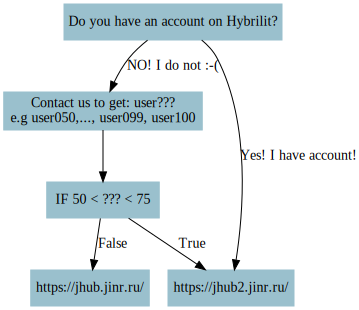

In [1]:
from graphviz import Digraph

D = Digraph(comment='Login quest:',node_attr={'shape': 'box'})

D.attr(size='6,6')
D.node_attr.update(color='lightblue3', style='filled')
D.node('A','Do you have an account on Hybrilit?')
D.node('F','Contact us to get: user??? \n e.g user050,..., user099, user100')
D.edge('A','F', label='NO! I do not :-(')
D.node('G',' IF 50 < ??? < 75')
D.edge('F','G')
D.edge('G','D',label='True')
D.node('D','https://jhub2.jinr.ru/')
D.edge('A','D',label='Yes! I have account!')
D.node('H','https://jhub.jinr.ru/')
D.edge('G','H',label='False')

D

# What should we expect from these data Ideas?
# 20160718
# 20113012
# 19981313
# 20161318

In [2]:
# # (Cell: 1)
# # Step 0 How to Install additional packages from Jupiter notebook?
import sys
import time
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # не использовать gpu

start = time.time()


from pandas_ml import ConfusionMatrix
!{sys.executable} -m pip install --upgrade --user pandas_ml
!{sys.executable} -m pip install --user graphviz
!{sys.executable} -m pip install --user pydotplus

Requirement already up-to-date: pandas_ml in /usr/local/lib/python3.6/site-packages (0.6.1)
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


# I. Data ...

In [3]:
# (Cell: 2)
# Step 1.0 Data: Your own copy of the data-files and Unix commands in Jupiter
!mkdir data
!ls -ltr /nfs/hybrilit.jinr.ru/scratch/ml-data
!cp  /nfs/hybrilit.jinr.ru/scratch/ml-data/* data/.
!ls data
!wc -l data/alice30.txt
!wc -l data/mobydick.txt
!wc -l data/Pride_and_Prejudice.txt
!echo ">>>>>>>>>>>>>> 0 <<<<<<<<<<<<<<<<<"
!head -n 10 data/alice30.txt 
!echo ">>>>>>>>>>>>>> 1 <<<<<<<<<<<<<<<<<"
!head -n 20 data/mobydick.txt
!echo ">>>>>>>>>>>>>> 3 <<<<<<<<<<<<<<<<<"
!head -n 10 data/Pride_and_Prejudice.txt

file0 ="./data/alice.txt"
file1 ="./data/mobydick.txt"
file2 ="./data/Pride_and_Prejudice.txt" 


total 1600
-rwxr-xr-x. 1 mctdhb hybrilit 148544 Apr  1  2019 alice30.txt
-rwxr-xr-x. 1 mctdhb hybrilit 146279 Apr  1  2019 alice.txt
-rwxr-xr-x. 1 mctdhb hybrilit 642914 Apr  1  2019 mobydick.txt
-rwxr-xr-x. 1 mctdhb hybrilit 692585 Apr  1  2019 Pride_and_Prejudice.txt
alice30.txt  alice.txt	mobydick.txt  Pride_and_Prejudice.txt
3599 data/alice30.txt
15568 data/mobydick.txt
4427 data/Pride_and_Prejudice.txt
>>>>>>>>>>>>>> 0 <<<<<<<<<<<<<<<<<

                ALICE'S ADVENTURES IN WONDERLAND

                          Lewis Carroll

               THE MILLENNIUM FULCRUM EDITION 3.0




>>>>>>>>>>>>>> 1 <<<<<<<<<<<<<<<<<
THE WORKS OF 
HERMAN MELVILLE 

STANDARD EDITION 

VOLUME 

VII 



MOBY- DICK 

OR, THE WHALE 

BY 

HERMAN MELVILLE 


>>>>>>>>>>>>>> 3 <<<<<<<<<<<<<<<<<
Pride and Prejudice
by Jane Austen


Chapter 1

It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.

However little known the feelings or views of such

## I.1 Data generation

In [4]:
#(Cell: 3)
# Step 1.1.1 Data:Data Preparation with fixed Line numbers n_lines = 2
import sys
from itertools import islice

def read_file_lines(file_path, n):
    with open(file_path) as fh:
        while True:
            lines = list(islice(fh, n))
            if lines: yield lines
            else:     break

file = file1
print('>>>>>>>>>>>> Read from: ',file)
data0=[]
n_lines = 3
for lines in read_file_lines(file, n_lines):
    #print ("\nsdda:","".join(lines))
    data0.append("".join(lines).replace('\n',' '))


len(data0),data0[58],data0[59],data0[60]


>>>>>>>>>>>> Read from:  ./data/mobydick.txt


(5190,
 'LVI. OF THE LESS ERRONEOUS PICTURES OF WHALES 337   LVII. OF WHALES IN PAINT, IN TEETH, ETC. . 342  ',
 ' LVIII. BRIT 346   ',
 'LIX. SQUID 350   LX. THE LINE . 353  ')

In [5]:
#(Cell: 4)
# Step 1.1.2 Data: Data Preparation in Blocks of fixed size #block_size=1024

def read_file_block(path, block_size=194):  #block_size=1024
    with open(path, 'rb') as f: 
        while True: 
            block = f.read(block_size) 
            if block: 
                yield block
            else: 
                return
file = file0
print('>>>>>>>>>>>> Read from: ',file)          
data1=[]
for piece in read_file_block(file):
    #print(piece)
    data1.append(piece.decode('utf8').replace('\r\n', '').replace('\n', ''))


len(data1),data1[51],data1[52],data1[53]

>>>>>>>>>>>> Read from:  ./data/alice.txt


(755,
 'ould see it quite plainly through the glass, and she tried her best to climb up one of the legs of the table, but it was too slippery; and when she had tired herself out with trying, the p',
 "oor little thing sat down and cried.'Come, there's no use in crying like that!' said Alice to herself, rather sharply; 'I advise you to leave off this minute!' She generally gave herself v",
 'ery good advice, (though she very seldom followed it), and sometimes she scolded herself so severely as to bring tears into her eyes; and once she remembered trying to box her own ears for h')

## I.3 Transfer data to Pandas

* Pandas: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html

In [6]:
#(Cell: 5)
# Step 1.3 Data: Transfer data to Pandas
import pandas as pd
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

df0=pd.DataFrame(data0,columns=["Text0"])
df1=pd.DataFrame(data1,columns=["Text1"])
df0.tail()
df1.tail()

,Text1
750,"nd all thy other queer noises, would change (she knew) to the confused clamour of the busy farm-yard--while the lowing of the cattle in the distance would take the place of the Mock Turtle's"
751,"heavy sobs.Lastly, she pictured to herself how this same little sister of hers would, in the after-time, be herself a grown woman; and how she would keep, through all her riper years, t"
752,"he simple and loving heart of her childhood: and how she would gather about her other little children, and make THEIR eyes bright and eager with many a strange tale, perhaps even with the dr"
753,"eam of Wonderland of long ago: and how she would feel with all their simple sorrows, and find a pleasure in all their simple joys, remembering her own child-life, and the happy summer days.\r"
754,


In [7]:
# (Cell: 6)
# Step 1.4 Data: Add labels - for supervised learning 
df0["label"]=0
df1["label"]=1
df0.tail()

,Text0,label
5185,aspect of this dangerous affair. But why say more ? All men live enveloped in whale -lines. All are born with halters round their necks ; but it is only when caught,0
5186,"in the swift, sudden turn of death, that mortals realise the silent, subtle, ever-present perils of life. And if you be a philosopher, though seated in the whale-boat, you",0
5187,"would not at heart feel one whit more of terror, than though seated before your evening fire with a poker, and not a harpoon, by your side.",0
5188,,0
5189,END OF VOL. I.,0


In [8]:
# (Cell: 7)
# Step 1.5 Data:  Lambda Operations with data - apply function to each element in column
#   Examples. ToLow Case: WORD -> word,  Count words in each block
def get_word_count(x):
    #res = x.lower() #  To LoW CaSe: converts all uppercase characters in a string into lowercase characters
    res = len(x.split()) 
    #print(res, x)
    return res


df0['Text0_words']  = df0.apply(lambda x: get_word_count(x['Text0']), axis=1) # general 
df0['Text0_words1'] = df0.apply(lambda x: len(x['Text0'].split()), axis=1)  # simple - one-line
df0.tail()
df0['Text0_words'].value_counts(sort=False).sort_index() #sort_values(ascending=False) # #.sum()
#df0['Text0_words'].describe()


df1['Text1_words']  = df1.apply(lambda x: get_word_count(x['Text1']), axis=1) # general 
df1['Text1_words'].value_counts(sort=False).sort_index()
df1['Text1_words'].describe()
df0.tail()


,Text0,label,Text0_words,Text0_words1
5185,aspect of this dangerous affair. But why say more ? All men live enveloped in whale -lines. All are born with halters round their necks ; but it is only when caught,0,32,32
5186,"in the swift, sudden turn of death, that mortals realise the silent, subtle, ever-present perils of life. And if you be a philosopher, though seated in the whale-boat, you",0,29,29
5187,"would not at heart feel one whit more of terror, than though seated before your evening fire with a poker, and not a harpoon, by your side.",0,27,27
5188,,0,0,0
5189,END OF VOL. I.,0,4,4


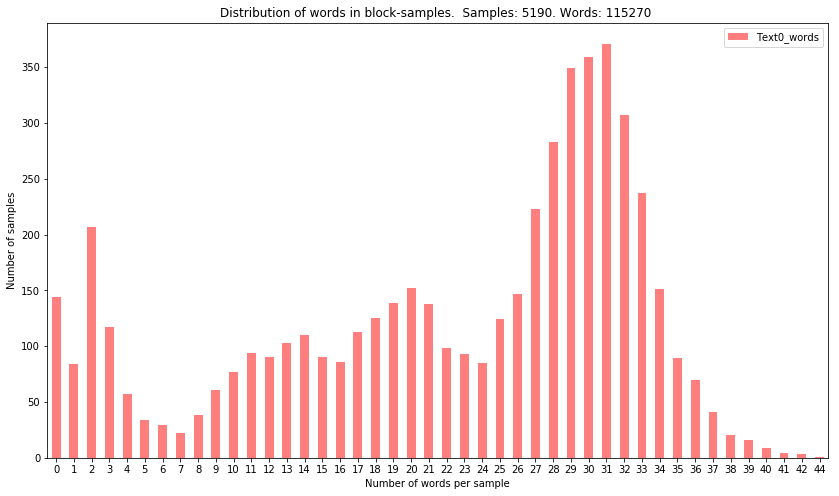

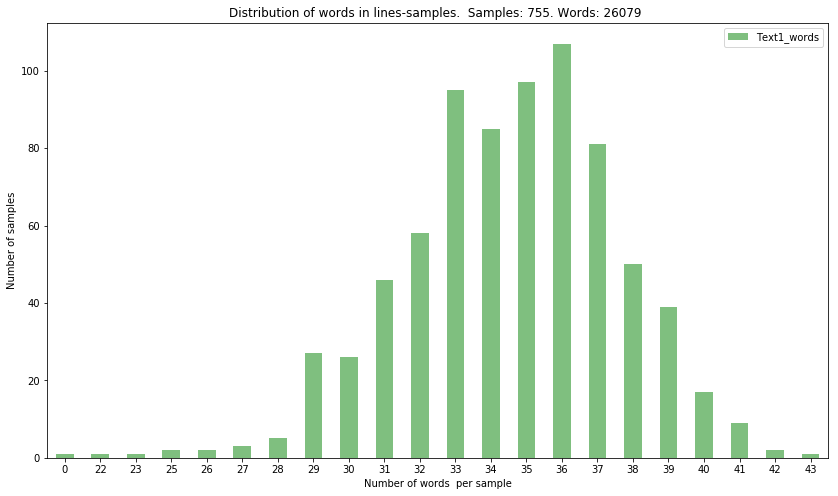

In [9]:
# (Cell: 8)
# Step 1.6 Data: Visualization 
# Plot Histogram ... - distribution of word counts
# PLOT BAR: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,8))
ax0 = fig.add_subplot(111)
df0['Text0_words'].value_counts(sort=False).sort_index().plot(ax=ax0,kind='bar',
                                                              rot=0, color="r", alpha=0.5, legend=True)
ax0.set_title("Distribution of words in block-samples.  Samples: {}. Words: {} ".format(
    df0['Text0_words'].shape[0], df0['Text0_words'].sum()))
ax0.set_ylabel("Number of samples")
ax0.set_xlabel("Number of words per sample")    
plt.show()

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
df1['Text1_words'].value_counts(sort=False).sort_index().plot(ax=ax1,kind='bar',
                                                              rot=0, color="g", alpha=0.5, legend=True)
ax1.set_title("Distribution of words in lines-samples.  Samples: {}. Words: {} ".format(
    df1['Text1_words'].shape[0], df1['Text1_words'].sum()))
ax1.set_ylabel("Number of samples")
ax1.set_xlabel("Number of words  per sample")
plt.show()




Text(0.5, 1.0, 'Number of samples Lines:  755. Blocks: 5190 ')

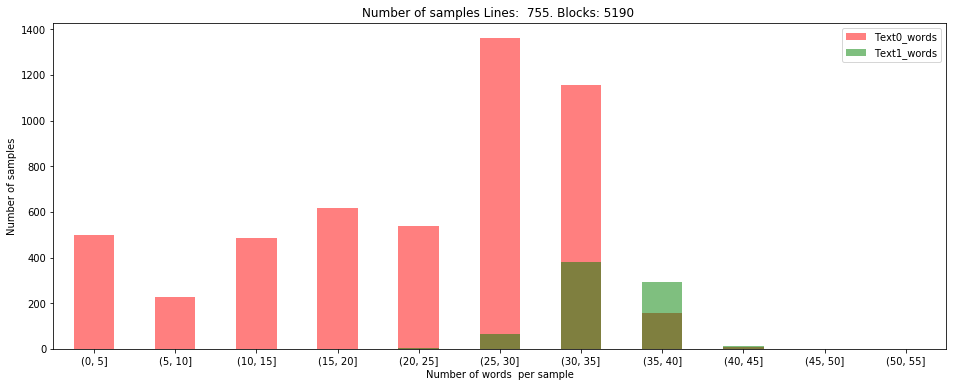

In [10]:
# (Cell: 9)
# Step 1.7 Data: Visualization Plot Histogram ... - distribution of word counts with bins
import matplotlib
import matplotlib.pyplot as plt

bins=[0, 20, 40, 60, 80, 100, 120, 140,160,180,220,260 ] # partition what to plot 
bins=[i*5 for i in range(12)]
labels = ["{}-{} words".format(bins[i], bins[i+1]) for i,v in enumerate(bins) if i < len(bins)-1]
#labels_good[0]="<10%"
data0 = df0['Text0_words']
out0 = pd.cut(data0, bins=bins, include_lowest=False) #, labels=labels)
out0.value_counts(sort=False).plot.bar(rot=0, color="r", figsize=(16,6), alpha=0.5,legend=True)

data1 = df1['Text1_words']
out1 = pd.cut(data1, bins=bins, include_lowest=False) #, labels=labels)
out1.value_counts(sort=False).plot.bar(rot=0, color="g", figsize=(16,6), alpha=0.5,legend=True)
plt.ylabel("Number of samples")
plt.xlabel("Number of words  per sample")

plt.title("Number of samples Lines:  {}. Blocks: {} ".format(
    df1['Text1_words'].shape[0], df0['Text0_words'].shape[0]))

## I.4 Join two DataFrames to final DF

In [11]:
# (Cell: 10)
# Step 1.4 Data: Join two DataFrames to final DF
df0.columns # 
df0.rename(index=str, columns={"Text0": "text", "Text0_words": "word_count"} ,inplace = True)
##df = pd.concat([df0, df1], ignore_index=True)
df1.columns
df1.rename(index=str, columns={"Text1": "text", "Text1_words": "word_count"} ,inplace = True)
df = pd.concat([df0, df1], ignore_index=True,sort=False)
df.label.value_counts(), df0.label.value_counts(),df1.label.value_counts()

(0    5190
 1    755 
 Name: label, dtype: int64, 0    5190
 Name: label, dtype: int64, 1    755
 Name: label, dtype: int64)

# II. Vectorization with sci-learning

* Info  Count: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
* Info TF-IDF: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html


In [12]:
# (Cell: 11)
# Step 2.1.1 Vectorization (intro): Semantics How2? Word count
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
   'This is the first document.',
   'This document is the second document.',
   'And this is the third one.  ',
   'Is this the first document? ',
]
vectorizer = CountVectorizer(
    analyzer='word', #'char_wb', 
    ngram_range =(1,1)
)
X = vectorizer.fit_transform(corpus)
print("Vocabulary:\n",vectorizer.vocabulary_)
print(vectorizer.get_feature_names())
print("Vectorized Corpus:\n",X.toarray())

Vocabulary:
 {'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
Vectorized Corpus:
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [13]:
# (Cell: 12)
# Step 2.1.2 Vectorization (intro): TF-IDF normalization etc...
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer(#use_idf=False, 
                             #max_features=3,
                             norm=None
                            )
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0.         1.22314355 1.51082562 1.         0.         0.
  1.         0.         1.        ]
 [0.         2.4462871  0.         1.         0.         1.91629073
  1.         0.         1.        ]
 [1.91629073 0.         0.         1.         1.91629073 0.
  1.         1.91629073 1.        ]
 [0.         1.22314355 1.51082562 1.         0.         0.
  1.         0.         1.        ]]


In [14]:
#(Cell: 13)
# Step 2.2 Vectorization: Our texts
# Our Documents Feature selection

max_features = 100
vectorizer_DOCs = TfidfVectorizer(use_idf=True,max_features = max_features ) #,max_df=0.98, min_df=10)
X0 = vectorizer_DOCs.fit_transform(df['text'])
print(" Text :\n", df['text'][1134])
print("Compact tfidf:\n",X0[1134])
X0=X0.toarray() # translation from compact presentation to full form 
print("Full tfidf :\n",X0[1134])
print(" Vocabulary aka Feature Names:\n",vectorizer_DOCs.get_feature_names())

 Text :
 Delight is to him, whom all the waves of the billows of  the seas of the boisterous mob can never shake from this  sure Keel of the Ages. And eternal delight and delicious-  
Compact tfidf:
   (0, 67)	0.5311560137707134
  (0, 48)	0.555368039176882
  (0, 6)	0.274366562251999
  (0, 74)	0.24110676449248633
  (0, 35)	0.2405877746669573
  (0, 78)	0.15211833528390176
  (0, 4)	0.22729241038772138
  (0, 29)	0.27011578707829464
  (0, 22)	0.2652985190921434
Full tfidf :
 [0.         0.         0.         0.         0.22729241 0.
 0.27436656 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.26529852 0.
 0.         0.         0.         0.         0.         0.27011579
 0.         0.         0.         0.         0.         0.24058777
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.55536804 0.         0.         0. 

# III. Feature Selection

In [15]:
#(Cell: 14)
# Step 3. Feature selection: Our documents
import numpy as np

# >>>>>>>>>>>>>> L A B E L S 
y = df["label"].values 

# >>>>>>>>>>>>>> C A T E G O R I C A L   F E A T U E S >>>>>>>>>>> OUR vectorized texts
X0 = X0
features_tfidf= vectorizer_DOCs.get_feature_names()
print("TF-Idf Vectors of Text [X0]:",X0.shape)

# >>>>>>>>>>>>>>  N U M E R I C A L   F E A T U R E S
features_num=[ 
           "word_count", 
          ] 
X1=df[features_num]
print("Vectors of numerical feature [X1]:",X1.shape)


# >>>>>>>>>>>>>>  Concatenate All features in ONE vector
X=np.concatenate((X0,X1),1)
features_all=features_tfidf  +  features_num

print("Concatenated Vectors of ALL feature [Num,TfIdf]==[X]:",X.shape)
#X1.values[1134]

TF-Idf Vectors of Text [X0]: (5945, 100)
Vectors of numerical feature [X1]: (5945, 1)
Concatenated Vectors of ALL feature [Num,TfIdf]==[X]: (5945, 101)


# IV. Split test and train sets

* Sci-Kit to split Test/Train: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [16]:
#(Cell: 15)
# Step 4. Split: Test and Train sets 
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

X0_train, X0_test, X1_train, X1_test, Xall_train, Xall_test, y_train, y_test = \
        train_test_split(X0, X1, X, y, random_state=42, test_size=0.33)
#Y_train
X0_train.shape, X0_test.shape, y_train.shape, y_test.shape

((3983, 100), (1962, 100), (3983,), (1962,))

# V. ML with Sci-Kit

* Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Parameters {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 101, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 3, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
ML training time : 0.09 [sec]
[0.         0.         0.66666667 0.66666667 0.        ] [0 0 1 0 0]
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>   Train MSE: 0.0063
Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3469
           1       0.98      0.97      0.98       514

   micro avg       0.99      0.99      0.99      3983
   macro avg       0.99      0.98      0.99      3983
weighted avg       0.99      0.99      0.99      3983

Train:
 Predicted  False  True  __all__
Actual                         
False      3458   11    3469   
True       14     500   514    
__all__    347

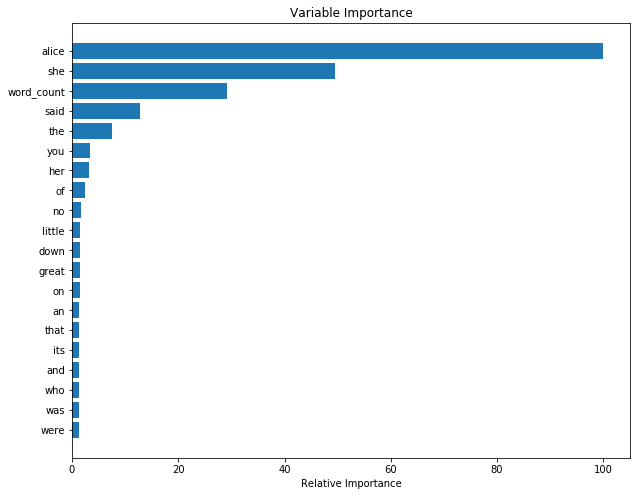

In [17]:
#(Cell: 16)
# Step 5.1 ML approach 
import numpy as np
from pandas_ml import ConfusionMatrix
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from pandas_ml import ConfusionMatrix

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier

from sklearn.tree import DecisionTreeRegressor

X_train= Xall_train #Xall_train #X=np.concatenate((X0,X1),1)
X_test = Xall_test #Xall_test
features = features_all # features_tfidf (X0), features_num (X1), features_all (X0 X1)

#X_train= X0_train # X0 TF-IDF
#X_test = X0_test 
#features =features_tfidf

#X_train= X1_train # X1 word count
#X_test = X1_test 
#features =features_num

max_features = X_test.shape[1]


clf0  = MultinomialNB() #fit_prior=True, class_prior=None)

clf1  = LogisticRegression( ) #random_state=0, solver='lbfgs')
                        # multi_class='multinomial')

clf2  = SGDClassifier() #loss='hinge', penalty='l2',
                       #  alpha=1e-3, random_state=42,
                       #   max_iter=5, tol=None)


clf3  = RandomForestRegressor(max_features=max_features,n_estimators=3) #,max_depth=40)
clf31 = RandomForestClassifier()

clf = clf3
print("Parameters",clf.get_params())

# Training model on X_train with labels y_train
tmML = time.time()
clf.fit(X_train, y_train) 
tmML = time.time() - tmML
print("ML training time : {:.2f} [sec]".format(tmML))

# To test quality of the Trained above model - use predict on X_test set
y_pred_prob = clf.predict(X_test) 

print(y_pred_prob[0:5],y_test[0:5])
y_train_rec_prob = clf.predict(X_train)
if y_pred_prob.dtype == 'float64':
    y_pred = np.around(y_pred_prob)
    y_train_rec = np.around(y_train_rec_prob)
else:
    y_train_rec = y_train_rec_prob
    y_pred = y_pred_prob

# Qunatifying quality of the trained model 
#ok for clf0 clf1 clf3
mse = mean_squared_error(y_train, y_train_rec)
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>   Train MSE: %.4f" % mse)
print("Train: \n",classification_report(y_train, y_train_rec)) 
mse = mean_squared_error(y_test, y_pred)
cmtr = ConfusionMatrix(y_train, y_train_rec)
print("Train:\n",cmtr) 
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>   Test  MSE: %.4f" % mse)
print("Test: \n",classification_report(y_test, y_pred)) 
cmts = ConfusionMatrix(y_test, y_pred)
print("Test :\n",cmts)

if (1 == 1):
    #Plot feature importance
    top_n=min(20,len(features))
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_names=np.array(features) #numpy.array([i  for i in range(feature_importance.shape[0])])
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    #print("Number of  features",feature_importance.shape[0],sorted_idx,feature_names[sorted_idx], 
    #feature_importance[sorted_idx])
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(22, 8))
    plt.subplot(1, 2, 2)
    plt.barh(pos[-top_n:], feature_importance[sorted_idx][-top_n:], align='center')
    plt.yticks(pos[-top_n:], feature_names[sorted_idx][-top_n:])
    plt.xlabel('Relative Importance')
    #plt.title('{}: Variable Importance'.format(company))
    plt.title('Variable Importance')
    plt.show()



In [18]:
#(Cell: 17)
# Step 5.2 Inference: Apply ML model to ALL our data and count errors
Xpred = X # X - all , X0 - tfidf , X1 - num 
y_ALL_rec_prob = clf.predict(Xpred)
df["y_ML_prob"] = y_ALL_rec_prob
if y_pred_prob.dtype == 'float64':
    y_ALL_rec_prob = np.around(y_ALL_rec_prob)
df["y_ML"] = y_ALL_rec_prob

df_out = df.iloc[np.where((df['label'] !=  df['y_ML']))] 
print("ML: Number of bad identifications: {} [{:.2f} %] out of {}"
      .format(df_out.shape[0], 100*df_out.shape[0]/df.shape[0],df.shape[0] ))

ML: Number of bad identifications: 104 [1.75 %] out of 5945


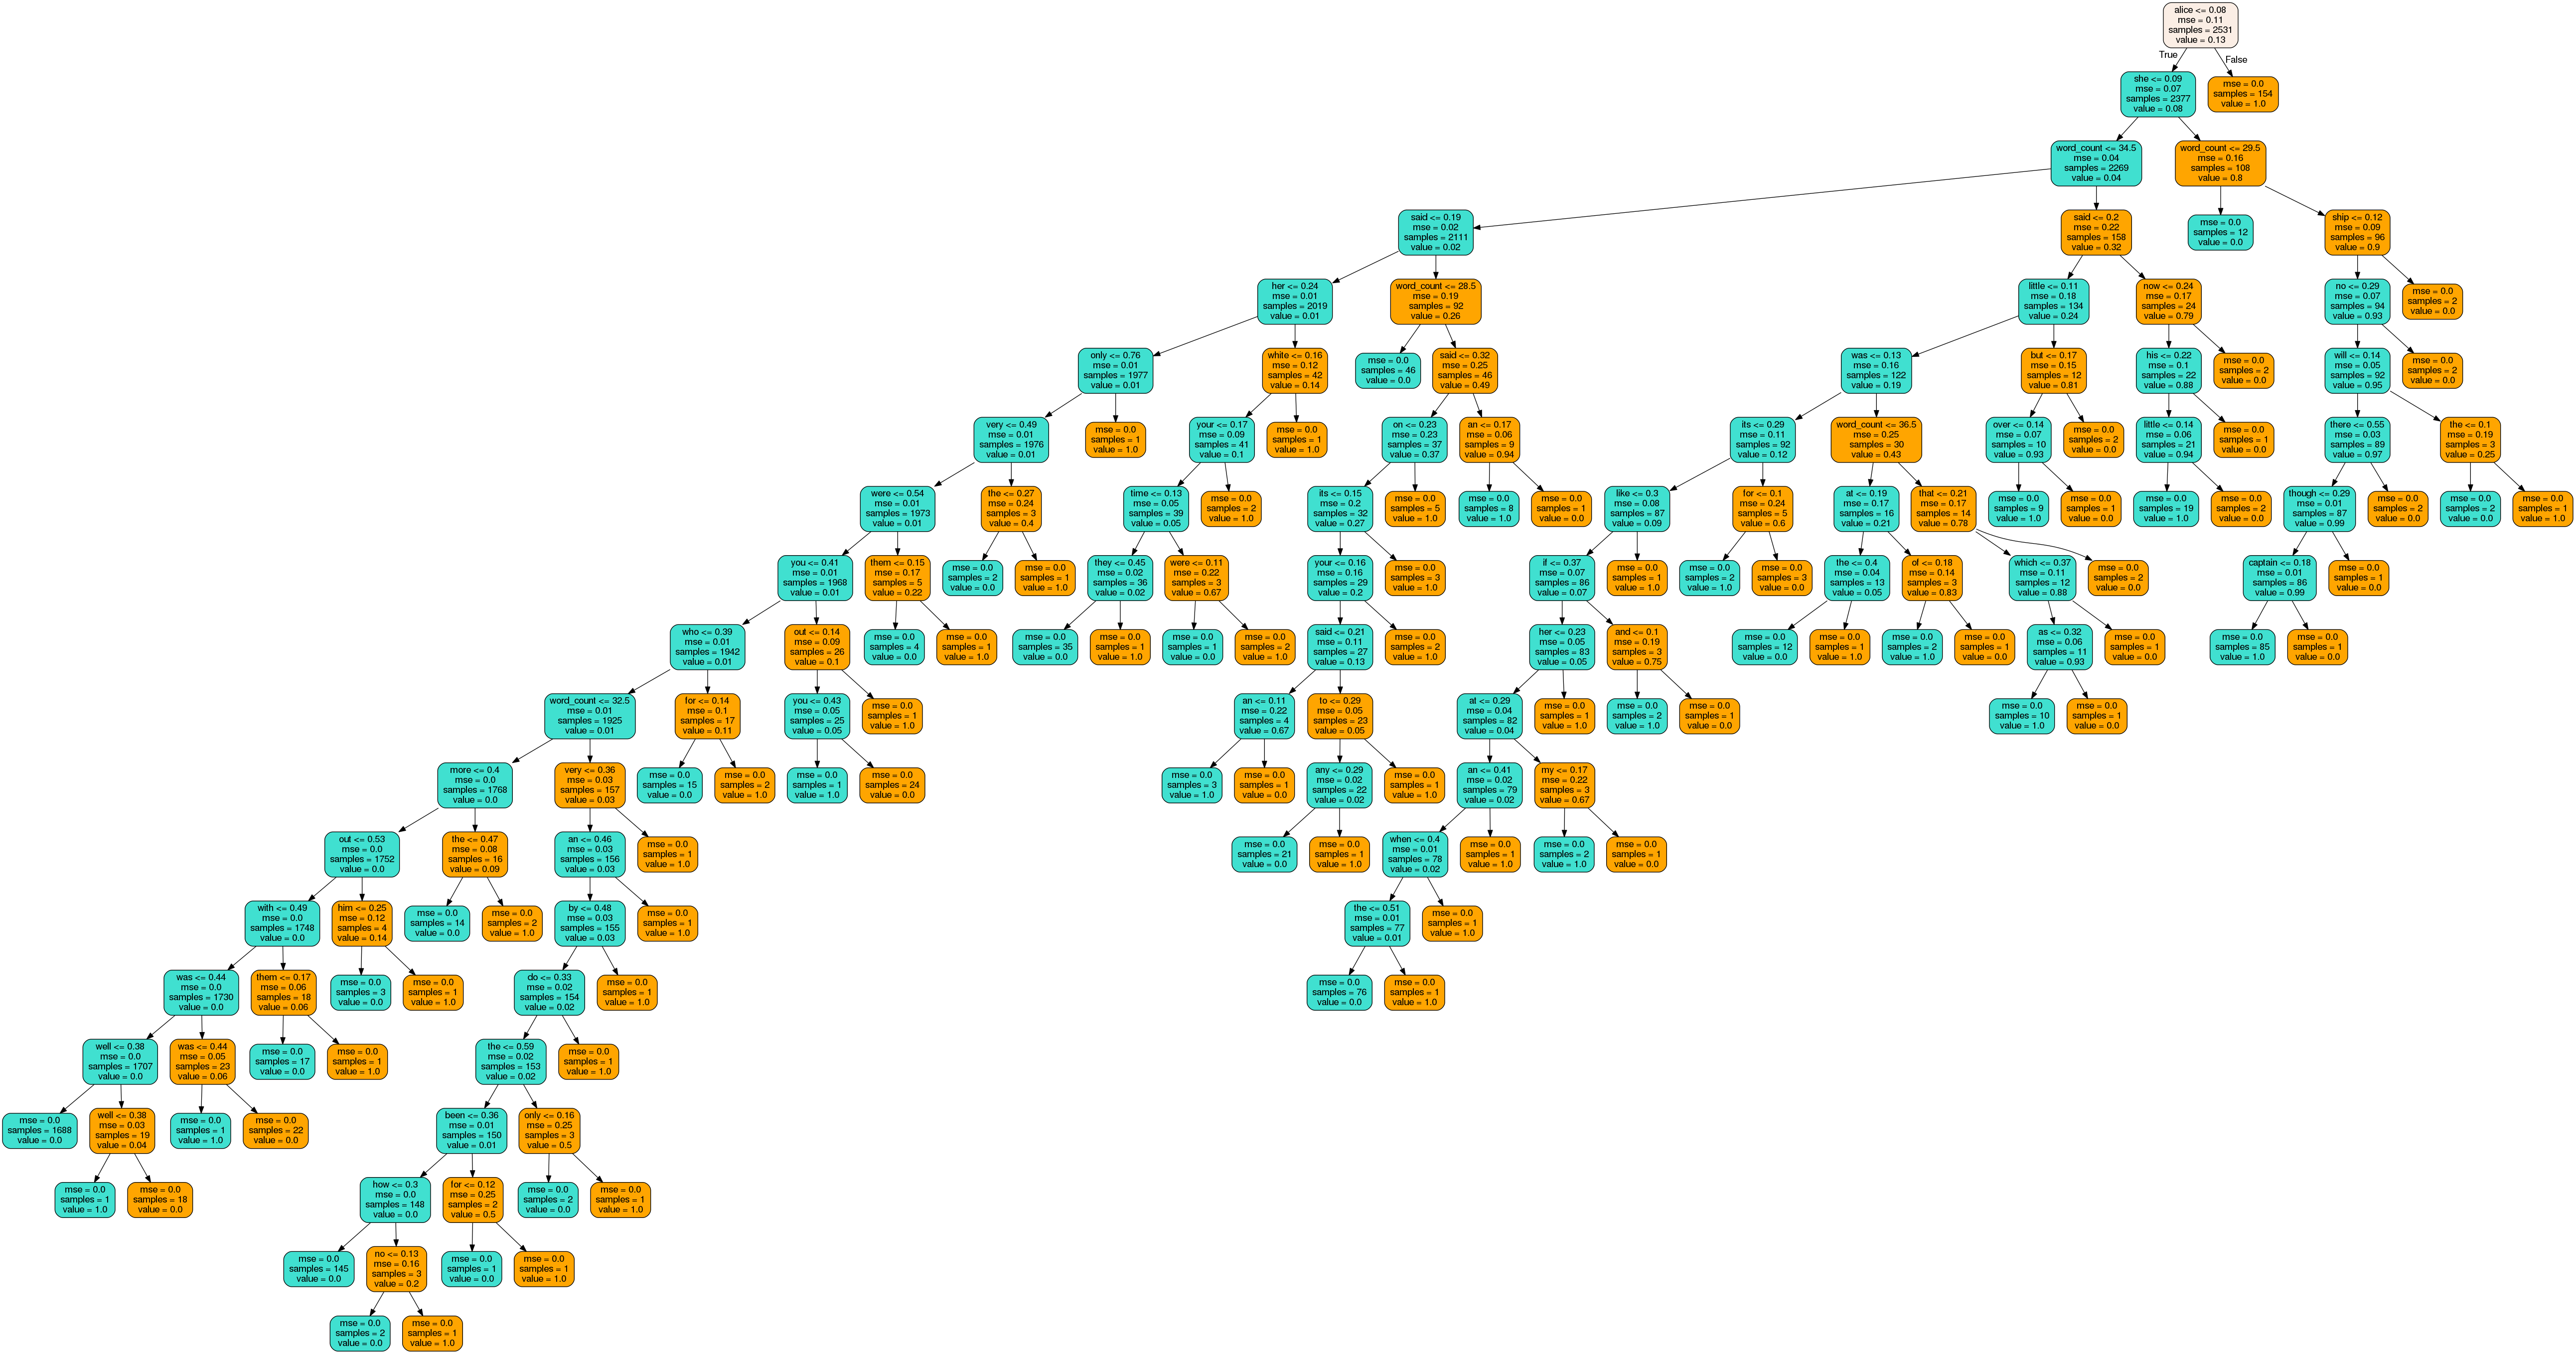

In [19]:
# (Cell: 18)
# Step 5.3 Decision Tree Vizualization: n_estimators - Number of trees...
# RandomForestRegressor(max_features=max_features,n_estimators=10)
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.tree import export_graphviz
import graphviz 
import pydotplus
import collections
# Display in jupyter notebook
from IPython.display import Image

# Extract single tree: 
estimator = clf.estimators_[2]

dot_data = export_graphviz(estimator,
                                feature_names=features,
                                out_file=None,
                                filled=True,  precision = 2, 
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])


#Image(graph.create_png())
display(Image(graph.create_png()))
#graph.write_png('tree.png')
#Image(filename = 'tree.png')

# VI. Deep learning apprach

* Original Keras: https://keras.io/
* TensorFlow (TF) - Keras: https://www.tensorflow.org/api_docs/python/tf/keras

In [20]:
# (Cell: 19)
# Step 6.1 DL: test available TF and Keras packages
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
#from keras.models import Model

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [22]:
# (Cell: 20)
# Step 6.2 DL: Several examples of DNN, CNN .. models
def build_model_DNN_minimal(input_dim):
    inputs = tf.keras.Input(shape=(input_dim,))
    output = tf.layers.Dense(2, activation=tf.nn.softmax)(inputs)
    model = models.Model(inputs=inputs, outputs=output)
    return model

def build_model_DNN(input_dim):
    inputs = tf.keras.Input(shape=(input_dim,))
    dns = tf.keras.layers.Dense(input_dim, activation=tf.nn.relu, name='dense1')(inputs)
    dns = tf.keras.layers.Dense(10, activation=tf.nn.relu, name='dense2')(dns)
    output = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(dns)
    model = models.Model(inputs=inputs, outputs=output)
    return model

def build_model_DNN_Attn(input_dim):
    inputs = tf.keras.Input(shape=(input_dim,))
    attention_probs = tf.keras.layers.Dense(input_dim, activation=tf.nn.relu, name='attention_vec')(inputs)
    attention_probs = tf.keras.layers.Dropout(0.1)(attention_probs)
    attention_mul   = tf.keras.layers.multiply([inputs, attention_probs], name='attention_mul')   
    dns = tf.keras.layers.Dense(input_dim, activation=tf.nn.relu, name='dense1')(attention_mul)
    output = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(dns)       
    model = models.Model(inputs=inputs, outputs=output)
    return model

def build_model_CNN(input_dim):
        inputs = tf.keras.Input(shape=(input_dim,))
        reshape = tf.keras.layers.Reshape((input_dim, 1), input_shape=(input_dim,))(inputs)
        c1 = tf.keras.layers.Conv1D(kernel_size = 4,
                                    filters = input_dim // 2, strides=1, activation='relu', 
                                    input_shape=(input_dim, 1))(reshape)
        p1 = tf.layers.MaxPooling1D(pool_size=2,strides=2)(c1)
        c2 = tf.keras.layers.Conv1D(kernel_size = 4,
                                    filters = input_dim // 2, strides=1, activation='relu', 
                                    input_shape=(input_dim, 1))(p1)
        p2 = tf.layers.MaxPooling1D(pool_size=2,strides=2)(c2)
        outlen = p2.shape[1] * p2.shape[2]
        c2flat = tf.keras.layers.Reshape([-1, outlen])(p2)
        encoding = tf.keras.layers.Dense(3, activation=tf.nn.relu)(c2flat)    
        output   = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(encoding)   
        #output   = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(c2flat)   
     
        model = models.Model(inputs=inputs, outputs=output)
        return model

    
# Here You can train : X0_train - tfidf, X1_train - numerical, Xall - combined 
X_train= Xall_train #Xall_train #Xall_train
X_test = Xall_test #Xall_test #Xall_test
Xpred =  X # X - all , X0 - tfidf , X1 - num 
max_features = X_test.shape[1]

#keras.backend.clear_session()
    
#Keras_model = build_model_DNN_minimal(input_dim=max_features)    # 1.37 % 
Keras_model = build_model_DNN(input_dim=max_features)           # 1.32 %
#Keras_model = build_model_DNN_Attn(input_dim=max_features)      # 0.67 % %
#Keras_model = build_model_CNN(input_dim=max_features)            # 1.57%

optimizer = tf.keras.optimizers.Adam(0.001)
Keras_model.compile(loss='sparse_categorical_crossentropy',
                #optimizer='adam',  
                optimizer=optimizer,
                metrics=['accuracy'])
Keras_model.summary()


tmKR = time.time()

#model.fit(X_train, y_train, epochs=15,validation_data=(X_test, y_test),)
Keras_model.fit(X_train, y_train, epochs=50,validation_data=(X_test, y_test),) 
#, batch_size=64, validation_split=0.5)
#model.fit(X, y , epochs=35, validation_split=0.3,) #, batch_size=64, validation_split=0.5)
tmKR = time.time() - tmKR
print("Keras training time : {:.2f} [sec]".format(tmKR))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 101)]             0         
_________________________________________________________________
dense1 (Dense)               (None, 101)               10302     
_________________________________________________________________
dense2 (Dense)               (None, 10)                1020      
_________________________________________________________________
dense (Dense)                (None, 2)                 22        
Total params: 11,344
Trainable params: 11,344
Non-trainable params: 0
_________________________________________________________________
Train on 3983 samples, validate on 1962 samples
Epoch 1/50
3983/3983 [==============================] - 1s 213us/sample - loss: 0.4658 - accuracy: 0.8639 - val_loss: 0.3444 - val_accuracy: 0.8772
Epoch 2/50
3983/3983 [==============================] - 0s 

3983/3983 [==============================] - 0s 78us/sample - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.1038 - val_accuracy: 0.9689
Keras training time : 18.05 [sec]


In [23]:
# (Cell: 21)
# Step 6.3 DL: Inference: Apply DL-Keras model to ALL our data and count errors 
test_loss, test_acc = Keras_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
predictions = Keras_model.predict(Xpred)
y_ALL= [np.argmax(i) for i in predictions]
df["y_DL"] = y_ALL
df_out = df.iloc[np.where((df['label'] !=  df['y_DL']))] 
print("DL-Keras: Number of bad identifications: {} [{:.2f} %] out of {}"
      .format(df_out.shape[0], 100*df_out.shape[0]/df.shape[0],df.shape[0] ))

1962/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.96890926
DL-Keras: Number of bad identifications: 101 [1.70 %] out of 5945


# VII. Deep Learning Approach TF with Estimators 

In [24]:
# (Cell: 22)
# Steps 7.1: INput for TF, 
#       7.2: INput _FN functions definitions fot TF

X_train = Xall_train 
X_test  = Xall_test
Xpred   = X # X - all , X0 - tfidf , X1 - num 

x_dict_train = {
    'ALL_features': X_train,
}
x_dict_test = {
    'ALL_features': X_test,
}

x_dict_all = {
    'ALL_features': Xpred,
}



def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(x_dict_train), y_train))
    #dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    dataset = dataset.shuffle(buffer_size=len(y_train))
    dataset = dataset.repeat(None)
    dataset = dataset.batch(batch_size=batch_size)
    #dataset = dataset.map(parse)
    iterator = dataset.make_one_shot_iterator()
    return iterator.get_next()

def eval_input_fn_all():
    dataset = tf.data.Dataset.from_tensor_slices((x_dict_all)) #, y_all))
    dataset = dataset.batch(batch_size)
    #dataset = dataset.map(parse)
    iterator = dataset.make_one_shot_iterator()
    return iterator.get_next()

def eval_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((x_dict_test, y_test))
    dataset = dataset.batch(batch_size)
    #dataset = dataset.map(parse)
    iterator = dataset.make_one_shot_iterator()
    return iterator.get_next()
def eval_input_fn_train():
    dataset = tf.data.Dataset.from_tensor_slices((x_dict_train, y_train))
    dataset = dataset.batch(batch_size)
    #dataset = dataset.map(parse)
    iterator = dataset.make_one_shot_iterator()
    return iterator.get_next()

x_dict_all.keys()
x_dict_train.keys(), x_dict_test.keys(), x_dict_all.keys()  #, vocab_size, embedding_size

(dict_keys(['ALL_features']),
 dict_keys(['ALL_features']),
 dict_keys(['ALL_features']))

In [30]:
# (Cell: 23)
#  Step 7.3 DL models DNN, CNN ...
def tf_model(features, labels, mode, params):
#>>>>>>>>>>>>>>>>>> I N P U T <<<<<<<<<<<<<<<<<<<<<<<<<<<<
    input_all = features['ALL_features']
    print(">>>>>>>>>>>>>>>> input_all   DIM:",input_all.get_shape())
    #print(">>>>>>>>>>>>>>>> bow_countDIM:",input_bow.get_shape())
#>>>>>>>>>>>>>>>>>> END I N P U T  END<<<<<<<<<<<<<<<<<<<<<<<<<<<<    

    dnn_attn= False #True
    if dnn_attn:
        #input_all = tf.cast(input_all, tf.float32)
        # DNN + ATTENTION 
        attn_dim = input_all.shape[1].value
       
        print(">>>>>>>>>>>>>>>> input/attn DNN  dim:",input_all.get_shape(),attn_dim )
        attn=  tf.layers.dense(input_all, attn_dim, activation=tf.nn.relu)
        #attn = tf.nn.dropout(attn, rate=0.2)
        hattn = tf.multiply(input_all,attn)
        #hattn1=hattn
        hattn1 = tf.layers.dense(hattn, attn_dim, activation=tf.nn.relu) 
        encoding = hattn1
        #encoding = tf.layers.dense(hattn1, 3, activation=tf.nn.relu)


    dnn= True #True
    if dnn:
        # Perceptron 
        #encoding = input_all 
        
        # DNN linear
        #h0 = tf.layers.dense(input_all, input_all.shape[1].value, activation=None) # linear model
        #encoding = h0
        # DNN - 1 dense relu 
        h1 = tf.layers.dense(input_all, input_all.shape[1].value, activation=tf.nn.relu) #dnn
        encoding = h1 
        # DNN add second dense
        h2 = tf.layers.dense(h1, 10, activation=tf.nn.relu)
        encoding = h2 
        
        
    cnn = False
    if cnn: 
        #input_all = tf.cast(input_all, tf.float32)
        N_INPUTS=input_all.shape[1].value #268
        print(">>>>>>>>>>>>>>>> input CNN ok dim:",input_all.get_shape())
        X = tf.reshape(input_all,
                   [-1, N_INPUTS, 1])  # as a 1D "sequence" with only one time-series observation (height)
        c1 = tf.layers.conv1d(X, filters=N_INPUTS // 2,
                          kernel_size=4, strides=1,
                          padding='same', activation=tf.nn.relu)
        p1 = tf.layers.max_pooling1d(c1, pool_size=2, strides=2)

        c2 = tf.layers.conv1d(p1, filters=N_INPUTS // 2,
                          kernel_size=4, strides=1,
                          padding='same', activation=tf.nn.relu)
        p2 = tf.layers.max_pooling1d(c2, pool_size=2, strides=2)
        outlen = p2.shape[1] * p2.shape[2]
        c2flat = tf.reshape(p2, [-1, outlen])
        cnn_h1 = tf.layers.dense(c2flat, 3, activation=tf.nn.relu)
        encoding = cnn_h1 # CNN acc: 0.8714: Test: 0.85 0.89
       
    rnn = False
    if rnn: 
        input_all = tf.cast(input_all, tf.float32)
        N_INPUTS=input_all.shape[1].value 
        print(">>>>>>>>>>>>>>>> input RNN ok dim:",input_all.get_shape())
        rnn_cell_size = N_INPUTS // 2
        X = tf.reshape(input_all,
                   [-1, N_INPUTS, 1])
    # 2. configure the RNN
        cell = tf.nn.rnn_cell.GRUCell(rnn_cell_size)
        outputs, state = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
    # 3. pass rnn output through a dense layer
        rnn_h1 = tf.layers.dense(state, N_INPUTS // 2, activation=tf.nn.relu)
        encoding = rnn_h1 # can not train properly !!!! :-(
        print(">>>>>>>>>>>>>>>> input RNN ok")
    
    
    print(">>>>>>>>>>>>>>>> Final layer with encoding ",encoding.get_shape())
    logits = tf.layers.dense(encoding, MAX_LABEL, activation=None) #(?, 2)
    print(">>>>>>>>>>>>>>>> logits ",logits.get_shape())
    predicted_classes = tf.argmax(logits, 1)
    print(">>>>>>>>>>>>>>>> predicted_classes ",predicted_classes.get_shape())
 

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode=mode,
            predictions={
                'class': predicted_classes,
                'prob': tf.nn.softmax(logits),
                #'attention': alphas
            })
 
    onehot_labels = tf.one_hot(labels, MAX_LABEL, 1, 0)
 
    loss = tf.losses.softmax_cross_entropy(
        onehot_labels=onehot_labels, logits=logits)
 
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
        #optimizer = tf.train.MomentumOptimizer(learning_rate=0.001, momentum=0.99)
        optimizer = tf.train.RMSPropOptimizer(learning_rate=0.001) ### best
        #optimizer = tf.contrib.opt.NadamOptimizer(learning_rate=0.001)
        #optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001) ### 

        train_op = optimizer.minimize(loss,
                                      global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode,
                                          loss=loss,
                                          train_op=train_op,
                                         )
 
    eval_metric_ops = {
        'accuracy': tf.metrics.accuracy(
            labels=labels, predictions=predicted_classes),
        'auc': tf.metrics.auc(
            labels=labels, predictions=predicted_classes),
    }
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [31]:
# (Cell: 25)
#  Step 7.5 Clean intermediate files from previous computations
import os
model_dir = os.path.join('./tf_model')
! ls tf_model/*
! rm -rf tf_model/*

tf_model/tf_model.ipynb  tf_model/tf_model.txt


In [34]:
# (Cell: 26)
#  Step 7.6 Training functions for DL models DNN, CNN ...
batch_size = 48 #256

MAX_LABEL = 2


run_config = tf.estimator.RunConfig(save_checkpoints_secs=500,
                                    log_step_count_steps=200,
                                    save_summary_steps=200,
                                    model_dir=model_dir,
                                    keep_checkpoint_max=3)
 
classifier = tf.estimator.Estimator(model_fn=tf_model, config=run_config) #, params=params)


W1125 17:06:03.186301 140646214367040 model_fn.py:630] Estimator's model_fn (<function tf_model at 0x7fea241f9510>) includes params argument, but params are not passed to Estimator.


In [33]:
# (Cell: 27)
# Step 7.7 Run  TF-Estimator training
tmTF = time.time()
classifier.train(input_fn=train_input_fn, steps=5000)
tmTF = time.time() - tmTF
print("TF training time : {:.2f} [sec]".format(tmTF))

W1125 17:03:46.710864 140646214367040 deprecation.py:506] From /usr/local/lib64/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W1125 17:03:46.713015 140646214367040 deprecation.py:323] From /usr/local/lib64/python3.6/site-packages/tensorflow_core/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


AttributeError: 'BatchDataset' object has no attribute 'make_one_shot_iterator'

In [ ]:
# (Cell: 28)
# Step 7.8 DL: Inference: DL - TRAIN data. Score & Confusion matrix 
scores = classifier.evaluate(input_fn=eval_input_fn)
print('Accuracy: {0:f}'.format(scores['accuracy']))
print('AUC: {0:f}'.format(scores['auc']))
y_train_pred = [p['class'] for p in classifier.predict(input_fn=eval_input_fn_train)] 
y_train_prob_dl = [p['prob'][1] for p in list(classifier.predict(input_fn=eval_input_fn_train)) ]
print(len(y_train_pred),"- DL Train: \n",classification_report(y_train, y_train_pred)) 
cmtr = ConfusionMatrix(y_train, y_train_pred)
print(cmtr)

In [ ]:
# (Cell: 29)
# Step 7.9 DL: Inference: DL - TEST data. Score Confusion matrix  Score and x_test
predictions = list(classifier.predict(input_fn=eval_input_fn))
y_pred_prob_dl = [p['prob'][1] for p in predictions ]
y_pred = [p['class'] for p in classifier.predict(input_fn=eval_input_fn)] 
print(len(y_pred),"- DL Test: \n",classification_report(y_test, y_pred)) 
cmts = ConfusionMatrix(y_test, y_pred)
print(cmts)

In [ ]:
# (Cell: 30)
# Step 7.10 DL - ALL: Inference: Apply DL-TF model to ALL our data and count errors 
y_pred_all_dl= [p['class'] for p in classifier.predict(input_fn=eval_input_fn_all)] 
df["y_DL_TF"] = y_pred_all_dl
df_out = df.iloc[np.where((df['label'] !=  df['y_DL_TF']))] 
print("DL-TF: Number of bad identifications: {} [{:.2f} %] out of {}"
      .format(df_out.shape[0], 100*df_out.shape[0]/df.shape[0],df.shape[0] ))

In [ ]:
# (Cell: 32) Summary
df_out = df.iloc[np.where((df['label'] !=  df['y_ML']))] 
print("ML  Sci-Kit:   Number of bad identifications: {} [{:.2f} %] out of {}, training time {:.2f} [sec]"
      .format(df_out.shape[0], 100*df_out.shape[0]/df.shape[0],df.shape[0], tmML ))
df_out = df.iloc[np.where((df['label'] !=  df['y_DL']))] 
print("DL  -   Keras: Number of bad identifications: {} [{:.2f} %] out of {}, training time {:.2f} [sec]"
      .format(df_out.shape[0], 100*df_out.shape[0]/df.shape[0],df.shape[0], tmKR ))
df_out = df.iloc[np.where((df['label'] !=  df['y_DL_TF']))] 
print("DL-TensorFlow: Number of bad identifications: {} [{:.2f} %] out of {}, training time {:.2f} [sec]"
      .format(df_out.shape[0], 100*df_out.shape[0]/df.shape[0],df.shape[0], tmTF ))

In [ ]:
# (Cell: 33) Total computational time
end = time.time()
print("Total execution time of all Cells : {:.2f} [sec]".format(end - start))